# Project: Image Classification On Fashion-Mnist Dataset

## Importing useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


## Checking the version of Tensorflow

In [2]:
tf.__version__

'2.2.0-rc3'

# Step-1 Data Preprocessing

## Loading the Fashion-Mnist dataset that is available in Keras library

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

## Downloading the Fashion-Mnist dataset & loading train and test data separately.

In [4]:
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

print("train images shape:", train_images.shape, "train labels shape:", train_labels.shape)

4423680/4422102 [==============================] - 2s 0us/step
train images shape: (60000, 28, 28) train labels shape: (60000,)


## Defining the output classes that the model will learn to predict.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Visualization

## Visualizing some of training and testing images using matplotlib library

#### Visualizing training image in the first index

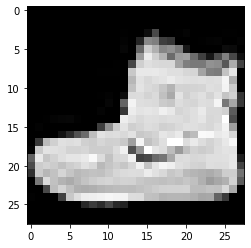

In [6]:
plt.imshow(train_images[0],cmap="gray")
plt.show()

#### Visualizing testing image in the first index

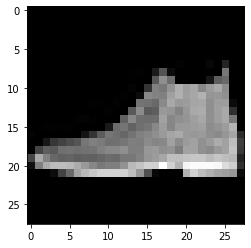

In [7]:
plt.imshow(test_images[0],cmap="gray")
plt.show()

#### Visualizing the  training image in the third index 

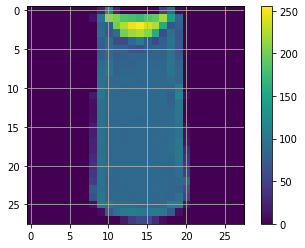

In [8]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(True)
plt.show()

## Visualizing the first 25 training images in 5 * 5 grid of images using matplotlib

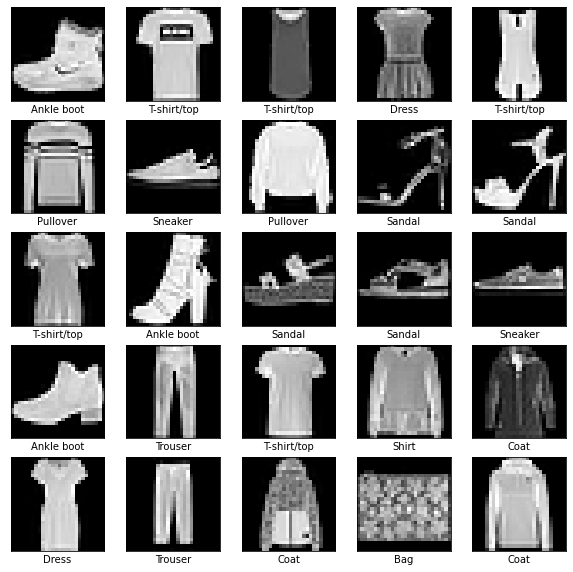

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Feature Scaling
#### The gray scale values of training and testing images are scaled between 0 to 1 after dividing by 255. This needs to be done while fitting the inputs into the neural network.

In [ ]:
training_images = train_images.astype('float32')/ 255
testing_images = test_images.astype('float32') / 255

# Step-2 : Model Building And Cross Validating

## Importing necessary libraries for building neural network architectures and performing cross validation

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [0]:
def build_classifier():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28,1)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model
    

## Cross Validating the model using 10-fold validation for batch-size = 25 and upto 10 epochs

In [0]:
model = KerasClassifier(build_fn=build_classifier,batch_size=25,nb_epoch=10)





In [0]:
accuracies = cross_val_score(estimator=model,X = training_images.reshape(-1,28,28,1),y=train_labels,cv=10,n_jobs=-1)

## Checking the accuracies of the model for 10 different validation strategies

In [17]:
print(accuracies)

[0.89349997 0.89733332 0.88583332 0.89816666 0.89216667 0.88633335
 0.88966668 0.88316667 0.87083334 0.884     ]


## Calculating the mean to get the average accuracy of the model in all the validation data

In [18]:
mean = accuracies.mean()
variance = accuracies.std()
print(mean)
print(variance)

0.8880999982357025
0.007630780292145032


## Printing the summary of the model with output shape and learnable parameters at each layer.

In [0]:
model = build_classifier()


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
# history = model.fit(training_images.reshape(-1,28,28,1), train_labels, epochs=10)

In [0]:
# test_loss,test_accuracy = model.evaluate(testing_images.reshape(-1,28,28,1),test_labels,verbose=2)
# print("\nTest accuracy : ",test_accuracy)

# Step-3: Fitting a model and evaluating the loss and accuracy of the model

In [26]:
histories = model.fit(training_images.reshape(-1,28,28,1), train_labels, epochs=10,validation_data=(testing_images.reshape(-1,28,28,1),test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.4711 - accuracy: 0.8332 - val_loss: 0.3050 - val_accuracy: 0.8875
Epoch 2/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.3164 - accuracy: 0.8858 - val_loss: 0.2708 - val_accuracy: 0.9009
Epoch 3/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.2709 - accuracy: 0.9010 - val_loss: 0.2481 - val_accuracy: 0.9068
Epoch 4/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.2394 - accuracy: 0.9109 - val_loss: 0.2440 - val_accuracy: 0.9145
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.2134 - accuracy: 0.9212 - val_loss: 0.2283 - val_accuracy: 0.9184
Epoch 6/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1966 - accuracy: 0.9267 - val_loss: 0.2221 - val_accuracy: 0.9233
Epoch 7/10
60000/60000 [==============================] - 8s 

## Visualizing training and testing loss of the model

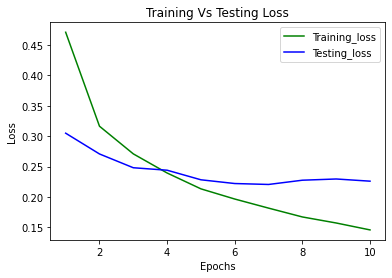

In [27]:
train_loss = histories.history['loss']
test_loss = histories.history['val_loss']
epochs = range(1,11)
plt.plot(epochs,train_loss,'g',label='Training_loss')
plt.plot(epochs,test_loss,'b',label='Testing_loss')
plt.title("Training Vs Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Visualizing training and testing accuracy of the model

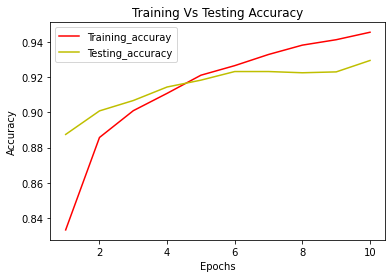

In [28]:
train_accuracy = histories.history['accuracy']
test_accuracy = histories.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs,train_accuracy,'r',label="Training_accuray")
plt.plot(epochs,test_accuracy,'y',label="Testing_accuracy")
plt.title("Training Vs Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Note:

##### After visualizing the graph, we found that the model starts overfitting after epochs 6 and the training accuracy and testing accuracy intersects each other at epochs = 4. So, it is better to use epochs = 4 or use some regularization techniques to prevent overfitting. One best way to deal with this problem can be using different learning straties after epochs exceed 4.